# This program will examine the different factors that are related to a student's test score. 


In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
# Creating the data frame
students=pd.read_csv(os.path.join(os.getcwd(), "StudentsPerformance.csv"))
avgScores=pd.concat([students["math score"], students["reading score"], students["writing score"]], axis=1)
students = students.drop(["math score", "reading score", "writing score"], axis = 1)
students['mean'] = avgScores.mean(axis=1)

categoricalVariables, numericalVariables = list(students.columns)[:5], list(students.columns)[5:]
#One-Hot encoding the categorical variables
for CV in categoricalVariables:
    dummies = pd.get_dummies(students[CV])
    students = students.drop(CV, axis = 1)
    students = students.join(dummies)

#Categorizing the response variable
def gradeAssign(data):
    if data["mean"] >= 60:
        return "Passed"
    return "Failed"

students["grade"] = students.apply(gradeAssign, axis = 1)
students = students.drop(["mean",],axis=1)

X,y = students[students.columns[:-1]], students[students.columns[-1]]

In [3]:
from StudentsPerformance import StudentsPerformance
classifiers = {"K Nearest Neighbors": KNeighborsClassifier(n_neighbors = 23), "Logistic Regression": LogisticRegression(penalty = "none"), 
              "Support Vector Classification": SVC(), "Gaussian Naive Bayes": GaussianNB(),
               "Decision Trees": DecisionTreeClassifier(ccp_alpha = .001, max_features = "sqrt"),
               "Random Forests": RandomForestClassifier(ccp_alpha = .0001)}
SP = StudentsPerformance()
for classifier in classifiers:
    SP.ClassifierComparison(X,y,classifier, classifiers[classifier])

K Nearest Neighbors works best with 2 principal components with an average accuracy of 73.1
Logistic Regression works best with 8 principal components with an average accuracy of 73.8
Support Vector Classification works best with 5 principal components with an average accuracy of 72.9
Gaussian Naive Bayes works best with 8 principal components with an average accuracy of 73.9
Decision Trees works best with 16 principal components with an average accuracy of 70.7
Random Forests works best with 2 principal components with an average accuracy of 70.4


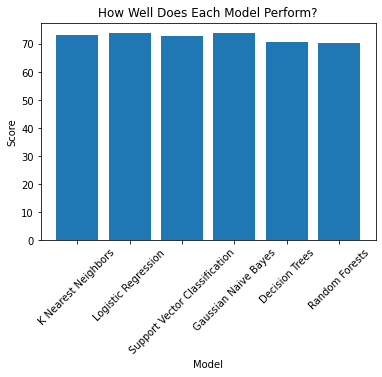

In [4]:
SP.graphComparisons()

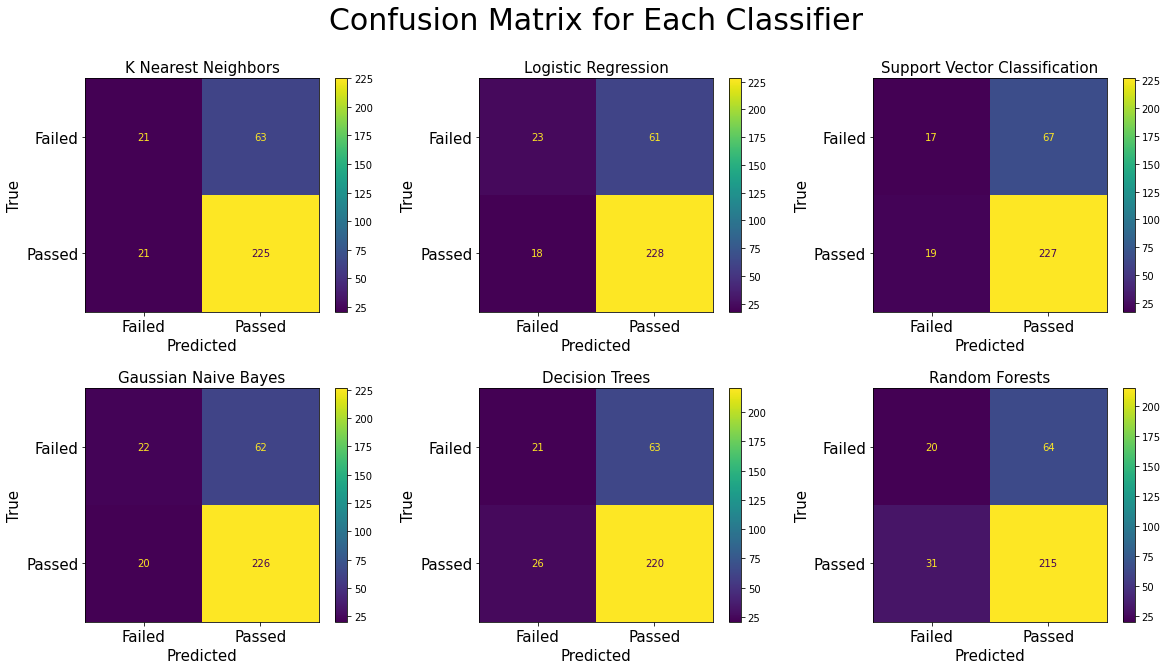

In [5]:
CM = SP.confusionMatrix(X,y)

In [6]:
SP.confusionMatrixMetrics

{'K Nearest Neighbors': {'TPR': 91.46, 'FPR': 75.0, 'TNR': 25.0, 'FNR': 8.54},
 'Logistic Regression': {'TPR': 92.68,
  'FPR': 72.62,
  'TNR': 27.38,
  'FNR': 7.32},
 'Support Vector Classification': {'TPR': 92.28,
  'FPR': 79.76,
  'TNR': 20.24,
  'FNR': 7.72},
 'Gaussian Naive Bayes': {'TPR': 91.87,
  'FPR': 73.81,
  'TNR': 26.19,
  'FNR': 8.13},
 'Decision Trees': {'TPR': 89.43, 'FPR': 75.0, 'TNR': 25.0, 'FNR': 10.57},
 'Random Forests': {'TPR': 87.4, 'FPR': 76.19, 'TNR': 23.81, 'FNR': 12.6}}

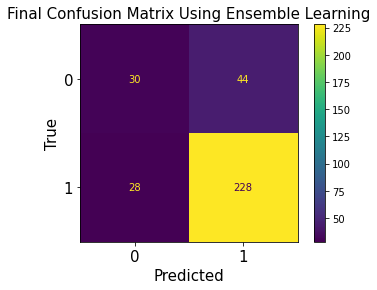

Final Accuracy: 78.18 %


In [7]:
SP.ensemble(X,y)